### Importing Required libraries

In [65]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split

In [29]:
# Load in dataset
df = pd.read_csv('housing1.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [30]:
df.shape

(545, 13)

### Data Cleaning

In [31]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [35]:
# Checking for any duplicate entries in the dataset
duplicates = df.duplicated().sum()

print(f"Their are {duplicates} duplicates in the dataset.")



Their are 0 duplicates in the dataset.


### Data visulization

<Figure size 720x360 with 0 Axes>

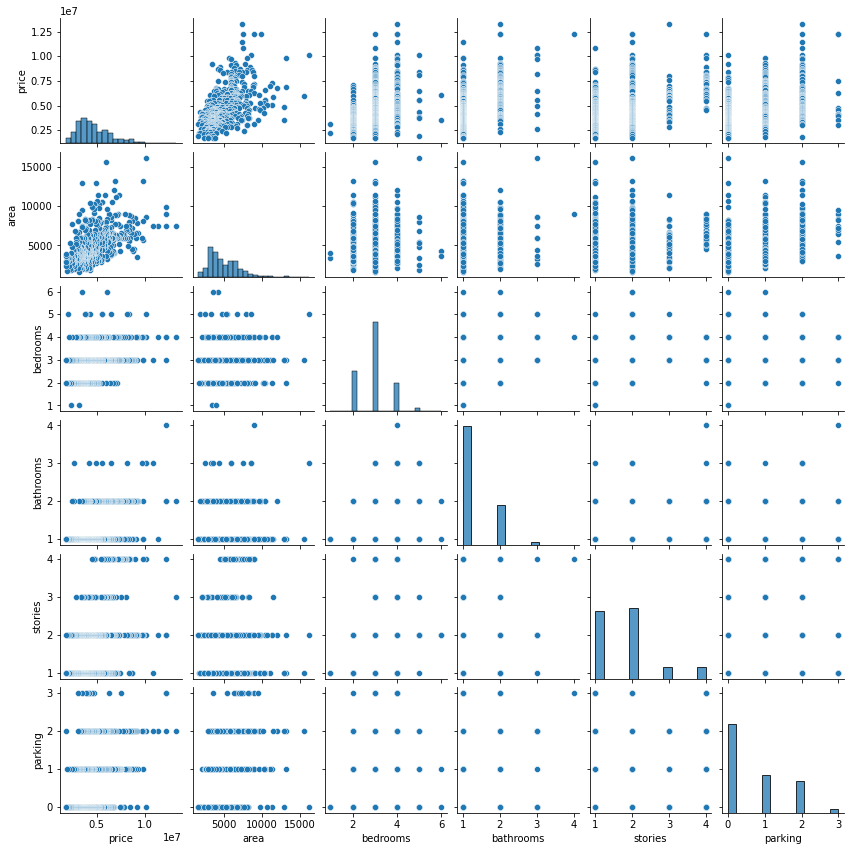

In [34]:
# Plotting a pariplot to see the pairwise relationships in a dataset
plt.figure(figsize=(10,5))
sns.pairplot(df, diag_kind="hist", height=2)
plt.show()

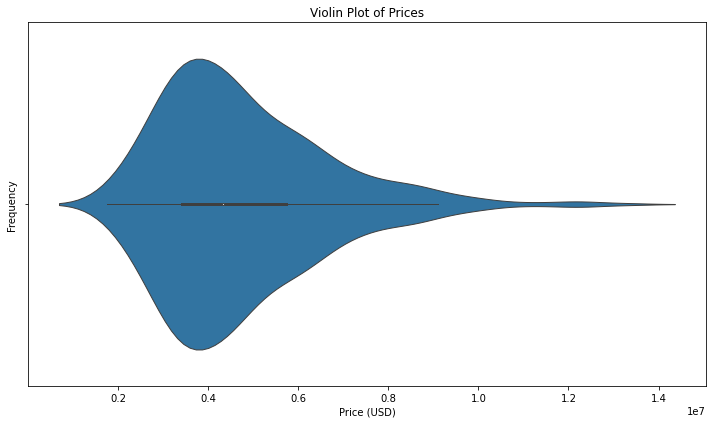

In [37]:
# Plotting a violon plot of the price column to identify outliers
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x=df["price"], linewidth=1, linecolor="k")
plt.title("Violin Plot of Prices")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In the violin plot above we can see that from 0.2 to 0.8 (USD) the covered ares in data data is significantly suggesting that there is large amount of obeservations in that range. 
The long tail extending past approximately 1 to 1.4 million USD indicates the presence of outliers in our data.

### Data Preprocessing

In [41]:
categorical_variable_change = df.dtypes==object

# Filter catergorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_variable_change ].tolist()

# Instantiating a labelEncoder class
le = LabelEncoder()
# Apply le on catergorical feature columns 
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))

df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


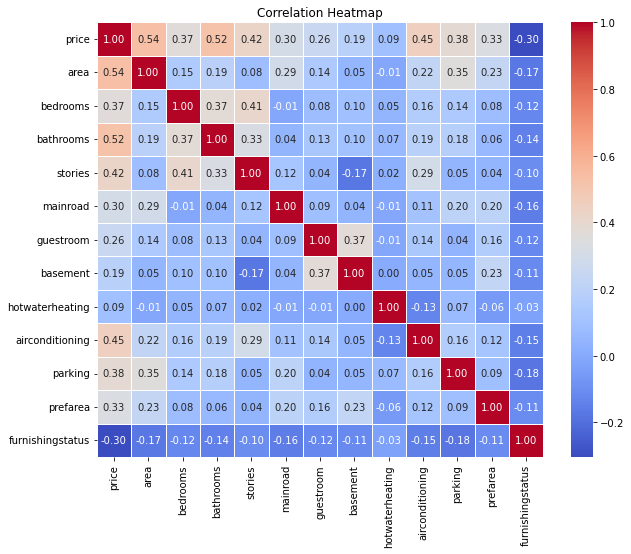

In [42]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

### Model Building

In [52]:
# Splitting data into dependent and independent variables
X = df.drop(columns=["price"]).values.reshape(-1, 12)
y = df["price"].values

In [53]:
# Splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [54]:
# Scaling the data
sc = StandardScaler()
X_train_scale = sc.fit_transform(X_train)
X_test_scale = sc.fit_transform(X_test)


In [55]:
# Implementing a multiple linear regression model
multiple_lr = LinearRegression()
multiple_lr.fit(X_train_scale, y_train)
y_pred = multiple_lr.predict(X_test_scale)

In [56]:
# Printing the metrics of the model
print(f"Model Score {round(multiple_lr.score(X_test_scale, y_test) * 100, 2)}%")


Model Score 61.97%


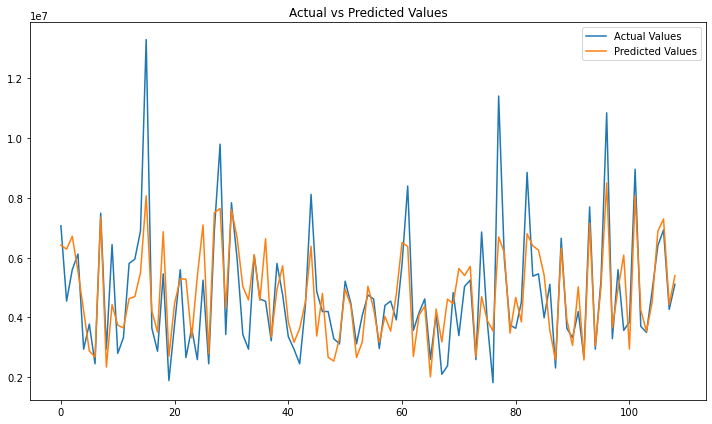

In [57]:
# Plotting the Predicted vs Actual Values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Actual Values")
plt.plot(y_pred, label="Predicted Values")
plt.title("Actual vs Predicted Values")
plt.tight_layout()
plt.legend()
plt.show()

This signifies that approximaterly 61.97% of the variance in housing prices can now be explained not only by the area but by other factors such as bathrooms, bedrooms and even the number of stories in a house. However, despite the significant difference in performance of the model it is essential to acknowlegde the presence of outliers. 

### Model Building - Removal of Outliers

In [59]:
# Defining my function called outliers
def outliers(df, col="price"):
    
    # Calculating q1, q3 and the inter-quartile range
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    # Calculating the upper and lower bound
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Creating a list of the indices of the positions of the outliers
    ls = df.index[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # Returning ls
    return ls.tolist()

# Calling my function
outlier_list = outliers(df)
outlier_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [60]:
# Dropping the outliers from the dataset
df.drop(outlier_list, inplace=True) 


In [61]:
df.shape

(530, 13)

We can see that 15 outlier have been removed from the dataset which brings us to a new shape of 530 rows and 13 columns the removal of the outliers represents a 0.03% decrease in the size of the data which we can consider neglgible. On to training our model. 

In [63]:
# Splitting data into dependent and independent variables
X = df.drop(columns=["price"]).values.reshape(-1, 12)
y = df["price"].values

Model Score 54.97%


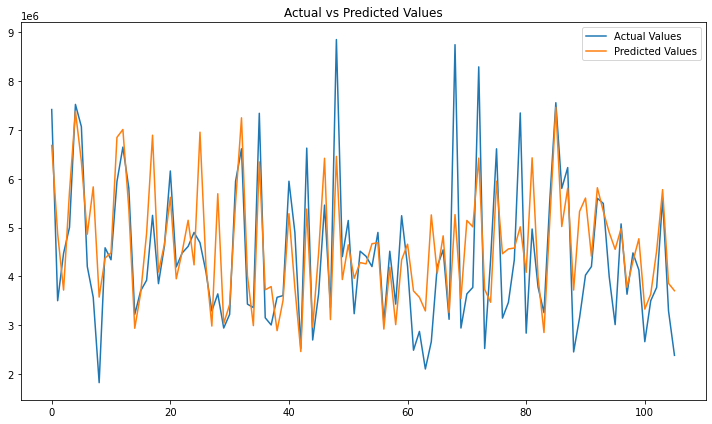

In [64]:
# Splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Scaling the data
sc = StandardScaler()
X_train_scale = sc.fit_transform(X_train)
X_test_scale = sc.fit_transform(X_test)

# Implementing a multiple linear regression model
multiple_lr = LinearRegression()
multiple_lr.fit(X_train_scale, y_train)
y_pred = multiple_lr.predict(X_test_scale)

# Printing the metrics of the model
print(f"Model Score {round(multiple_lr.score(X_test_scale, y_test) * 100, 2)}%")

# Plotting the Predicted vs Actual Values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Actual Values")
plt.plot(y_pred, label="Predicted Values")
plt.title("Actual vs Predicted Values")
plt.tight_layout()
plt.legend()
plt.show()

we can see that even though our predictions are much better on the graph the score has decreased from 61.97% (Including Outliers) to 54.97% (Excluding Outliers).
This could has happened due to the following factors: 

1. Loss of Information - The outliers may have contained valuable information about rare occurences or extreme cases in the data.Removing them lead to a loss of information which might have been essential for the model to generalize well to unseen data. 

2. Overfitting - It is also possible that the model was overfitting to the outliers and removing them helped to alleviate overfitting. 